1.Import Data and packages
2.Understand the data
3.Data visualisation
4.Data cleansing and preparation
5.Modelling and prediction

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
test_df = pd.read_csv("test.csv", parse_dates=['Dates'])
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          884262 non-null  int64         
 1   Dates       884262 non-null  datetime64[ns]
 2   DayOfWeek   884262 non-null  object        
 3   PdDistrict  884262 non-null  object        
 4   Address     884262 non-null  object        
 5   X           884262 non-null  float64       
 6   Y           884262 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 47.2+ MB
None


In [159]:
train_df = pd.read_csv("train.csv", parse_dates=['Dates'])
train_df = train_df.drop(['Descript','Resolution'], axis=1)
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   DayOfWeek   878049 non-null  object        
 3   PdDistrict  878049 non-null  object        
 4   Address     878049 non-null  object        
 5   X           878049 non-null  float64       
 6   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 46.9+ MB
None


In [160]:
train_df['Category'].value_counts().sort_values(ascending=False)

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

<AxesSubplot:ylabel='Category'>

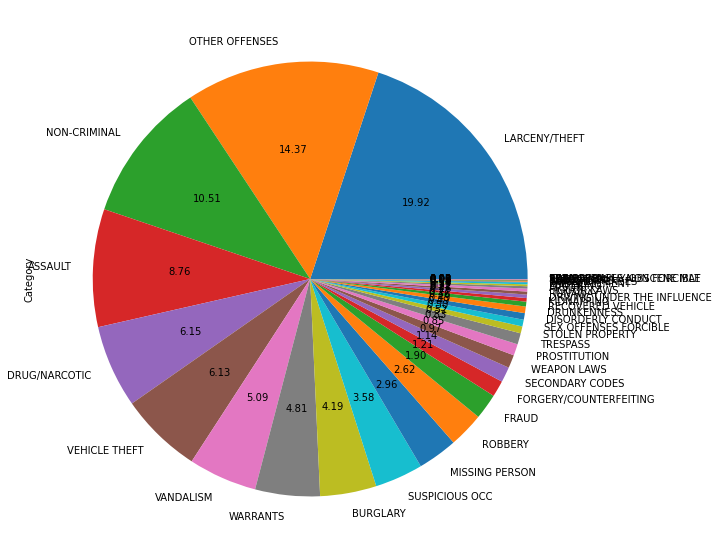

In [161]:
train_df['Category'].value_counts().plot(figsize=(10,10),kind='pie', autopct='%1.2f')

In [162]:
train_df

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [163]:
test_df

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...,...
884257,884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479


# Geographical features

In [164]:
train_df.describe()
#lat for SF is 37 and long is -122 -> (X=-120.5,Y=90) is an abnormal entry

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [165]:
test_df.describe()
#same abnormal Y values happen in test set as well

,Id,X,Y
count,884262.000000,884262.000000,884262.000000
mean,442130.500000,-122.422693,37.771476
std,255264.596206,0.030985,0.484824
min,0.000000,-122.513642,37.707879
25%,221065.250000,-122.433069,37.752374
50%,442130.500000,-122.416517,37.775421
75%,663195.750000,-122.406959,37.784353
max,884261.000000,-120.500000,90.000000


In [170]:
train_df[(train_df['Y'] == train_df['Y'].max()) & (train_df['X'] == train_df['X'].max())]

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,Friday,TENDERLOIN,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,Friday,BAYVIEW,JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
660712,2005-12-30 00:34:00,ASSAULT,Friday,BAYVIEW,JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
661106,2005-12-29 00:07:00,NON-CRIMINAL,Thursday,TENDERLOIN,5THSTNORTH ST / EDDY ST,-120.5,90.0
666430,2005-11-30 11:25:00,OTHER OFFENSES,Wednesday,TENDERLOIN,5THSTNORTH ST / ELLIS ST,-120.5,90.0
...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,Wednesday,INGLESIDE,JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0
845842,2003-06-09 09:25:00,OTHER OFFENSES,Monday,INGLESIDE,JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,Friday,SOUTHERN,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0
857248,2003-04-14 16:30:00,ROBBERY,Monday,BAYVIEW,GILMAN AV / FITCH ST,-120.5,90.0


In [171]:
test_df[(test_df['Y'] == test_df['Y'].max()) & (test_df['X'] == test_df['X'].max())]

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
664733,664733,2005-12-20 14:57:00,Tuesday,TENDERLOIN,7THSTNORTH ST / MCALLISTER ST,-120.5,90.0
664734,664734,2005-12-20 14:57:00,Tuesday,TENDERLOIN,7THSTNORTH ST / MCALLISTER ST,-120.5,90.0
664826,664826,2005-12-20 07:36:00,Tuesday,RICHMOND,GEARY BL / AVENUE OF THE PALMS,-120.5,90.0
664895,664895,2005-12-19 23:08:00,Monday,TENDERLOIN,EDDY ST / 5THSTNORTH ST,-120.5,90.0
667226,667226,2005-12-06 09:40:00,Tuesday,RICHMOND,GEARY BL / AVENUE OF THE PALMS,-120.5,90.0
...,...,...,...,...,...,...,...
830647,830647,2003-09-12 23:00:00,Friday,NORTHERN,AUSTIN ST / LARKIN ST,-120.5,90.0
830648,830648,2003-09-12 23:00:00,Friday,NORTHERN,AUSTIN ST / LARKIN ST,-120.5,90.0
836254,836254,2003-08-16 17:30:00,Saturday,SOUTHERN,SPEAR ST / THE EMBARCADERO SOUTH ST,-120.5,90.0
836255,836255,2003-08-16 17:30:00,Saturday,SOUTHERN,SPEAR ST / THE EMBARCADERO SOUTH ST,-120.5,90.0


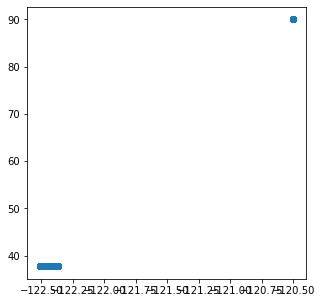

number of entries outside SF: 67


In [174]:
fig = plt.figure(figsize =(5, 5))
plt.scatter(train_df['X'],train_df['Y'])
plt.show()
#clearly a group of coordinates are not in SF
print('number of entries outside SF:',len(train_df[train_df['Y'] == train_df['Y'].max()]))
#there are 67 of those abnormal points -> we have 878049 training samples, I think we are safe to drop them
#note:same error entry Y=90 happens in test set as well

In [175]:
#drop abnormal dots in train set
#note: cannot get rid of those in test set -> submission must have 884262 rows
train_df = train_df.loc[train_df['Y'] != train_df['Y'].max()]

In [176]:
#replace abnormal value by median
test_df['X'] = test_df['X'].replace(test_df['X'].max(), test_df['X'].median())
test_df['Y'] = test_df['Y'].replace(test_df['Y'].max(), test_df['Y'].median())
test_df.describe()

,Id,X,Y
count,884262.000000,884262.000000,884262.000000
mean,442130.500000,-122.422874,37.766987
std,255264.596206,0.025323,0.024178
min,0.000000,-122.513642,37.707879
25%,221065.250000,-122.433069,37.752374
50%,442130.500000,-122.416517,37.775421
75%,663195.750000,-122.406970,37.784353
max,884261.000000,-122.365241,37.819975


Geological values: 
80000+ pairs of coordinates basically cover the whole SF area
try:divide SF into n little squres and use square label as a new feature

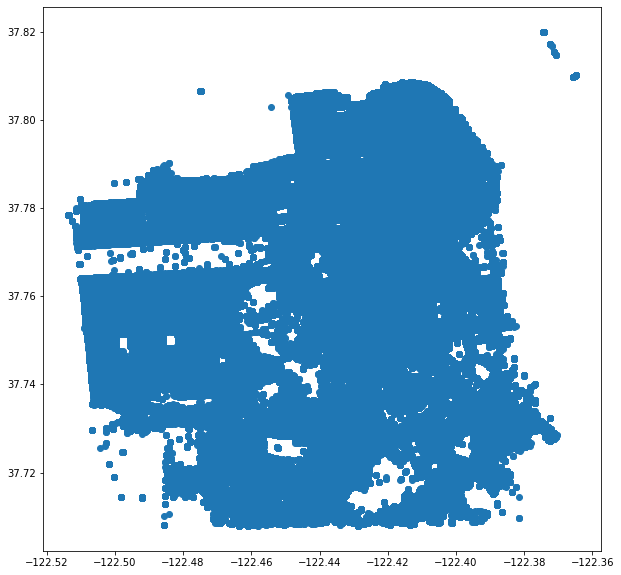

In [177]:
fig = plt.figure(figsize =(10, 10))
plt.scatter(train_df['X'],train_df['Y'])
plt.show()

In [178]:
#apply Kmeans clustering to train set and test set simultaneously
#try using n_clusters = 36 because there are 36 neighbourhoods in SF
from sklearn.cluster import KMeans
train_test_df = pd.concat([train_df,test_df],axis=0)
coordinates = train_test_df.loc[:,['X','Y']] 
kmeans = KMeans(n_clusters= 36).fit(coordinates)
train_test_df['cluster'] = kmeans.labels_

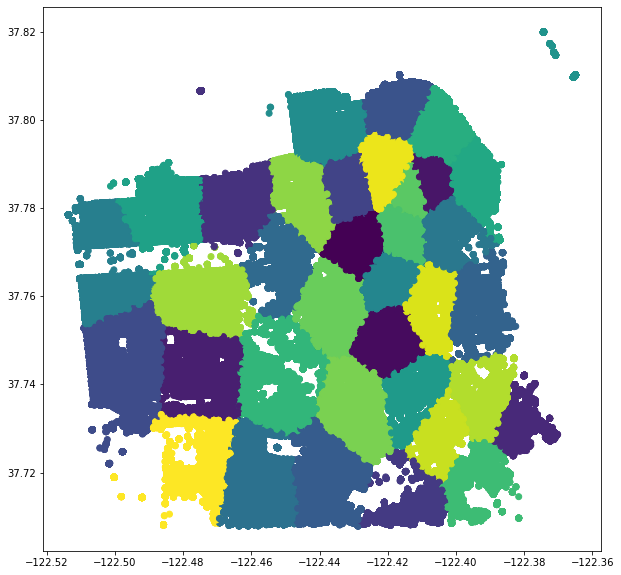

In [179]:
fig = plt.figure(figsize =(10, 10))
plt.scatter(train_test_df['X'],train_test_df['Y'],c=kmeans.labels_.astype(float))
plt.show()


In [180]:
train_test_df

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Id,cluster
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN,9
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN,17
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,NaN,29
...,...,...,...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,NaN,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987,884257.0,33
884258,2003-01-01 00:01:00,NaN,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681,884258.0,34
884259,2003-01-01 00:01:00,NaN,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075,884259.0,10
884260,2003-01-01 00:01:00,NaN,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479,884260.0,31


other possible features derive from coordinates:
1. distance to police station in the district
2. rich/poor neighbourhood (housing price in that area)

Could the distance to the nearest police station be a feature? 
Coordintes of 10 main police stations (one per district):
Northern: -122.4324,37.7802
Southern: -122.38944, 37.77266
Central: -122.41003, 37.79864
Mission: -122.42205, 37.76302
Tenderloin: -122.41282, 37.78400
Bayview: -122.39784, 37.73010
Ingleside: -122.44624, 37.72480
Park: -122.45509, 37.76784
Richmond: -122.46444, 37.78018
Taraval: -122.48159, 37.74376

In [181]:
import math
def get_shortest_dist(origin):
    l=float('inf')
    destination = [[-122.4324,37.7802],
                   [-122.38944, 37.77266],
                   [-122.41003, 37.79864],
                   [-122.42205, 37.76302],
                   [-122.41282, 37.78400],
                   [-122.39784, 37.73010],
                   [-122.44624, 37.72480],
                   [-122.45509, 37.76784],
                   [-122.46444, 37.78018],
                   [-122.48159, 37.74376]]
    for des in destination:
        d = math.dist(origin,des)
        if d < l:
            l = d
    return l
                

#get_shortest_dist([-122.4815,37.7437])

In [182]:
train_test_df['PsDist'] = train_test_df.apply(lambda row: get_shortest_dist([row['X'],row['Y']]),axis=1)

In [183]:
train_test_df

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Id,cluster,PsDist
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0,0.008587
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0,0.008587
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN,9,0.014442
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN,17,0.017112
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,NaN,29,0.010730
...,...,...,...,...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,NaN,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987,884257.0,33,0.017101
884258,2003-01-01 00:01:00,NaN,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681,884258.0,34,0.014339
884259,2003-01-01 00:01:00,NaN,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075,884259.0,10,0.012752
884260,2003-01-01 00:01:00,NaN,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479,884260.0,31,0.014039


How to use the features of address?
1. either intersection: contains '/' or block: contains 'block'
2. street type: last part after spliting by ' ' -> need to think about intersection as it may contain 2 street type

In [184]:
train_test_df.loc[:,'Intersection']=train_test_df['Address'].apply(lambda x : 1 if '/' in x else 0)
train_test_df['Block']=train_test_df['Address'].apply(lambda x : 1 if 'Block' in x else 0)
train_test_df['StreetType']=train_test_df['Address'].apply(lambda x : x.split(' ')[-2] if x.split(' ')[-1] == '/' else x.split(' ')[-1])


In [185]:
train_test_df['StreetType'].value_counts().sort_values(ascending=False)

ST              1316689
AV               330276
BL                38904
DR                26940
WY                12932
RD                 7822
CT                 6195
HY                 5029
PZ                 4762
LN                 3700
TR                 2868
PL                 2767
CR                  939
AL                  734
I-80                606
WAY                 365
TER                 204
PALMS               196
HWY                 171
MAR                  37
STWY                 28
EX                   27
PARK                 21
WK                   12
RW                    8
BUFANO                5
FERLINGHETTI          4
I-280                 3
Name: StreetType, dtype: int64

In [23]:
#Turn categorical features into numerical 

In [186]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_test_df['PdDistrictCode'] = le.fit_transform(train_test_df['PdDistrict'])
train_test_df['StreetTypeCode'] = le.fit_transform(train_test_df['StreetType'])


In [187]:
train_test_df['PdDistrictCode'].unique()

array([4, 5, 2, 0, 6, 1, 8, 9, 3, 7])

In [188]:
train_test_df['cluster'].unique()

array([ 0,  9, 17, 29,  6, 28,  4, 15,  8, 26,  7, 32, 31,  1, 23,  2,  3,
       27, 21, 35, 10, 34, 30, 12, 11, 14, 25, 24, 16, 22, 19,  5, 33, 13,
       20, 18], dtype=int32)

In [189]:
train_test_df
#Geo features: ['cluster','Intersection','Block','PdDistrictCode','StreetTypeCode','PsDist']

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Id,cluster,PsDist,Intersection,Block,StreetType,PdDistrictCode,StreetTypeCode
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0,0.008587,1,0,ST,4,21
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0,0.008587,1,0,ST,4,21
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN,9,0.014442,1,0,ST,4,21
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN,17,0.017112,0,1,ST,4,21
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,NaN,29,0.010730,0,1,ST,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,NaN,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987,884257.0,33,0.017101,0,1,ST,3,21
884258,2003-01-01 00:01:00,NaN,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681,884258.0,34,0.014339,0,1,ST,4,21
884259,2003-01-01 00:01:00,NaN,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075,884259.0,10,0.012752,0,1,ST,2,21
884260,2003-01-01 00:01:00,NaN,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479,884260.0,31,0.014039,0,1,AV,0,1


# Time features

In [190]:
#extract year, month, hour from Dates
train_test_df['Hour'] = train_test_df['Dates'].dt.hour
train_test_df['Month'] = train_test_df['Dates'].dt.month
train_test_df['Year'] = train_test_df['Dates'].dt.year

In [191]:
#make DayofWeek into numerical value
days = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
train_test_df['WeekdayCode'] = train_test_df['DayOfWeek'].apply(lambda x: days[x])

Generate new features from time:
1. categorize months into season
2. categorize hour into morning/afternoon/evening/late night
3. categorize weekdays into weekend/weekday

In [192]:
train_test_df['SeasonCode'] = train_test_df['Month']%12 // 3 + 1
train_test_df['Weekend'] = train_test_df['WeekdayCode'].apply(lambda x: 1 if x>=6 else 0)
train_test_df = train_test_df.assign(TimeBin=pd.cut(train_test_df['Hour'],[0,6,12,18,23],labels =['Night','Morning','Afternoon','Evening'],include_lowest=True))

In [227]:
Bin = {'Night':int(0),'Morning':int(1),'Afternoon':int(2),'Evening':int(3)}
train_test_df['TimeBinCode'] = train_test_df['TimeBin'].apply(lambda x: Bin[x])

In [228]:
train_test_df.dtypes

Dates             datetime64[ns]
Category                  object
DayOfWeek                 object
PdDistrict                object
Address                   object
X                        float64
Y                        float64
Id                       float64
cluster                    int32
PsDist                   float64
Intersection               int64
Block                      int64
StreetType                object
PdDistrictCode             int64
StreetTypeCode             int64
Hour                       int64
Month                      int64
Year                       int64
WeekdayCode                int64
SeasonCode                 int64
Weekend                    int64
TimeBin                 category
TimeBinCode             category
dtype: object

In [194]:
#time feature:['Hour','Month','Year','WeekdayCode','SeasonCode','Weekend','TimeBinCode']

In [195]:
print(len(train_df))
print(len(test_df))

877982
884262


In [196]:
train_df = train_test_df[:len(train_df)]
test_df = train_test_df[len(train_df):]

In [197]:
le = preprocessing.LabelEncoder()
train_df['CategoryCode'] = le.fit_transform(train_df['Category'])
train_df['CategoryCode'].unique()

<ipython-input-197-80def0a60f04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['CategoryCode'] = le.fit_transform(train_df['Category'])


array([37, 21, 16, 36, 35, 20, 25,  1, 38,  4, 32,  8, 12,  7, 30, 27, 34,
       19, 13, 15, 26,  6, 28, 23,  5,  0, 11, 17,  3,  9, 31, 18, 29, 10,
       14,  2, 33, 24, 22])

In [198]:
train_df

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Id,cluster,PsDist,...,StreetTypeCode,Hour,Month,Year,WeekdayCode,SeasonCode,Weekend,TimeBin,TimeBinCode,CategoryCode
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0,0.008587,...,21,23,5,2015,3,2,0,Evening,3,37
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,0,0.008587,...,21,23,5,2015,3,2,0,Evening,3,21
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN,9,0.014442,...,21,23,5,2015,3,2,0,Evening,3,21
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN,17,0.017112,...,21,23,5,2015,3,2,0,Evening,3,16
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,NaN,29,0.010730,...,21,23,5,2015,3,2,0,Evening,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,NaN,13,0.016706,...,1,0,1,2003,1,1,0,Night,0,25
878045,2003-01-06 00:01:00,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,NaN,23,0.007235,...,21,0,1,2003,1,1,0,Night,0,16
878046,2003-01-06 00:01:00,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,NaN,14,0.010142,...,21,0,1,2003,1,1,0,Night,0,16
878047,2003-01-06 00:01:00,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,NaN,21,0.008022,...,21,0,1,2003,1,1,0,Night,0,35


In [199]:
test_df

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Id,cluster,PsDist,...,PdDistrictCode,StreetTypeCode,Hour,Month,Year,WeekdayCode,SeasonCode,Weekend,TimeBin,TimeBinCode
0,2015-05-10 23:59:00,NaN,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,0.0,32,0.005250,...,0,1,23,5,2015,7,2,1,Evening,3
1,2015-05-10 23:51:00,NaN,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,1.0,31,0.006734,...,0,1,23,5,2015,7,2,1,Evening,3
2,2015-05-10 23:50:00,NaN,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2.0,34,0.013610,...,4,21,23,5,2015,7,2,1,Evening,3
3,2015-05-10 23:45:00,NaN,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,3.0,10,0.009473,...,2,21,23,5,2015,7,2,1,Evening,3
4,2015-05-10 23:45:00,NaN,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,4.0,10,0.009473,...,2,21,23,5,2015,7,2,1,Evening,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,NaN,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987,884257.0,33,0.017101,...,3,21,0,1,2003,3,1,0,Night,0
884258,2003-01-01 00:01:00,NaN,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681,884258.0,34,0.014339,...,4,21,0,1,2003,3,1,0,Night,0
884259,2003-01-01 00:01:00,NaN,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075,884259.0,10,0.012752,...,2,21,0,1,2003,3,1,0,Night,0
884260,2003-01-01 00:01:00,NaN,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479,884260.0,31,0.014039,...,0,1,0,1,2003,3,1,0,Night,0


# Visualisation

In [200]:
#use Theft as an example to try feature selection
Theft = train_df[train_df['Category']=='LARCENY/THEFT']
#Theft.loc[:,'SeasonCode'] = Theft['Month']%12 // 3 + 1
Theft.columns

Index(['Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y',
       'Id', 'cluster', 'PsDist', 'Intersection', 'Block', 'StreetType',
       'PdDistrictCode', 'StreetTypeCode', 'Hour', 'Month', 'Year',
       'WeekdayCode', 'SeasonCode', 'Weekend', 'TimeBin', 'TimeBinCode',
       'CategoryCode'],
      dtype='object')

Text(0.5, 1.0, 'Block or not')

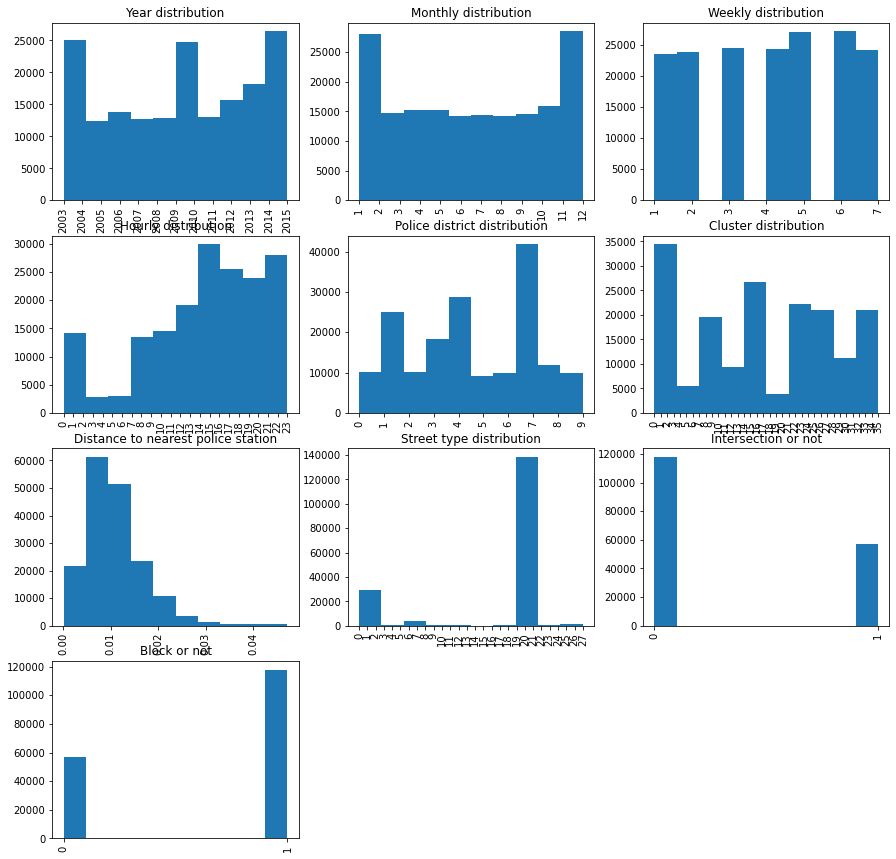

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))

plt.subplot(431)
plt.hist(Theft['Year'])
plt.xticks(range(2003,2016),rotation='vertical')
plt.title("Year distribution")

plt.subplot(432)
plt.hist(Theft['Month'])
plt.xticks(range(1,13),rotation='vertical')
plt.title("Monthly distribution")

plt.subplot(433)
plt.hist(Theft['WeekdayCode'])
plt.xticks(range(1,8),rotation='vertical')
plt.title("Weekly distribution")


plt.subplot(434)
plt.hist(Theft['Hour'])
plt.xticks(range(0,24),rotation='vertical')
plt.title("Hourly distribution")


plt.subplot(435)
plt.hist(Theft['PdDistrictCode'])
plt.xticks(range(0,10),rotation='vertical')
plt.title("Police district distribution")

plt.subplot(436)
plt.hist(Theft['cluster'])
plt.xticks(range(0,36),rotation='vertical')
plt.title("Cluster distribution")

plt.subplot(437)
plt.hist(Theft['PsDist'])
plt.xticks(rotation='vertical')
plt.title("Distance to nearest police station")

plt.subplot(438)
plt.hist(Theft['StreetTypeCode'])
plt.xticks(range(0,28),rotation='vertical')
plt.title("Street type distribution")

plt.subplot(439)
plt.hist(Theft['Intersection'])
plt.xticks(range(0,2),rotation='vertical')
plt.title("Intersection or not")

plt.subplot(4,3,10)
plt.hist(Theft['Block'])
plt.xticks(range(0,2),rotation='vertical')
plt.title("Block or not")

# Model prediction

In [371]:
from sklearn.model_selection import train_test_split
#X = train_df[['Year','Month','Hour','WeekdayCode','PdDistrictCode','cluster']]
#X = train_df[['Year','Month','Hour','WeekdayCode','PdDistrictCode','cluster','PsDist','StreetTypeCode','Intersection','Block']]
X = train_df[['cluster','Intersection','PdDistrictCode','StreetTypeCode','Hour','Month','Year','WeekdayCode','SeasonCode','PsDist']]
Y = train_df['CategoryCode']
#X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
#we select a miniset of data (X2) to try our model
X_1, X_2, y_1, y_2 = train_test_split(X, Y, test_size=0.20, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)
print(len(X2_train))

122917


In [372]:
X2_train

,cluster,Intersection,PdDistrictCode,StreetTypeCode,Hour,Month,Year,WeekdayCode,SeasonCode,PsDist
356698,0,0,4,21,16,6,2010,2,3,0.011180
665789,27,0,3,21,18,12,2005,4,1,0.014779
262553,16,0,3,21,18,10,2011,6,4,0.003106
345791,17,1,4,21,15,7,2010,4,3,0.020943
103842,26,0,1,21,21,12,2013,3,1,0.003758
...,...,...,...,...,...,...,...,...,...,...
621796,12,0,5,1,8,7,2006,7,3,0.011889
384878,7,1,4,21,20,12,2009,1,1,0.002205
786179,0,0,4,21,23,3,2004,1,2,0.005407
206440,33,0,3,1,8,8,2012,1,3,0.014794


In [373]:
print(y2_train.nunique())

39


In [374]:
print(y2_test.nunique())

39


In [375]:
test = test_df[['cluster','Intersection','PdDistrictCode','StreetTypeCode','Hour','Month','Year','WeekdayCode','SeasonCode','PsDist']]

In [278]:
test_df

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Id,cluster,PsDist,...,PdDistrictCode,StreetTypeCode,Hour,Month,Year,WeekdayCode,SeasonCode,Weekend,TimeBin,TimeBinCode
0,2015-05-10 23:59:00,NaN,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,0.0,32,0.005250,...,0,1,23,5,2015,7,2,1,Evening,3
1,2015-05-10 23:51:00,NaN,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,1.0,31,0.006734,...,0,1,23,5,2015,7,2,1,Evening,3
2,2015-05-10 23:50:00,NaN,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2.0,34,0.013610,...,4,21,23,5,2015,7,2,1,Evening,3
3,2015-05-10 23:45:00,NaN,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,3.0,10,0.009473,...,2,21,23,5,2015,7,2,1,Evening,3
4,2015-05-10 23:45:00,NaN,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,4.0,10,0.009473,...,2,21,23,5,2015,7,2,1,Evening,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,NaN,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987,884257.0,33,0.017101,...,3,21,0,1,2003,3,1,0,Night,0
884258,2003-01-01 00:01:00,NaN,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681,884258.0,34,0.014339,...,4,21,0,1,2003,3,1,0,Night,0
884259,2003-01-01 00:01:00,NaN,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075,884259.0,10,0.012752,...,2,21,0,1,2003,3,1,0,Night,0
884260,2003-01-01 00:01:00,NaN,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479,884260.0,31,0.014039,...,0,1,0,1,2003,3,1,0,Night,0


baseline:predict all results are Theft code 16 - the category with most observations\
in order to calculate logloss, need to create a ndarray of size len(X2_test)*39
only [16] of list is 1 -> probability of Theft is 1

In [454]:
from sklearn import metrics
import numpy as np
prob_list = [0] * 39
prob_list[16] = 1
Y_bl = np.array([prob_list]*len(X2_test))
print("baseline logloss is:",log_loss(y2_test,Y_bl))

baseline logloss is: 27.64216688659512


In [455]:
#logistic regression model
from sklearn import linear_model
lr = linear_model.LogisticRegression(max_iter=10000)
Y_lr = lr.fit(X2_train,y2_train).predict_proba(X2_test)
print("Logistic Regression logloss is:",log_loss(y2_test,Y_lr))

Logistic Regression logloss is: 2.6127082373867134


/Users/julieyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [379]:
#knn untuned
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
knn_untuned = KNeighborsClassifier()
Y_knn_untuned = knn_untuned.fit(X2_train,y2_train).predict_proba(X2_test)
print("KNN untuned logloss is:",log_loss(y2_test,Y_knn_untuned))

KNN untuned logloss is: 19.595716356145502


In [381]:
#knn tuned 
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(180,200)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
Y_knn_tuned = knn_cv.fit(X2_train,y2_train).predict_proba(X2_test)
print(knn_cv.best_params_)
print(knn_cv.best_score_) 
print("KNN tuned logloss is:",log_loss(y2_test,Y_knn_tuned))

/Users/julieyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'n_neighbors': 182}
0.22709636370190078
KNN tuned logloss is: 3.278908286777072


In [382]:
print(np.shape(Y_knn_tuned))

(52680, 39)


In [415]:
#knn final model prediction: use optimal parameters n_neighbors=182
knn = KNeighborsClassifier(n_neighbors=182)
Y_pred_knn = knn.fit(X2_train,y2_train).predict_proba(test)

In [442]:
print(Y_pred_knn)

[[0.         0.12087912 0.         ... 0.07142857 0.08241758 0.03846154]
 [0.         0.10989011 0.         ... 0.06043956 0.07142857 0.04395604]
 [0.00549451 0.0989011  0.         ... 0.02747253 0.04945055 0.01098901]
 ...
 [0.00549451 0.13186813 0.         ... 0.0989011  0.04945055 0.00549451]
 [0.         0.15384615 0.         ... 0.1043956  0.06043956 0.01098901]
 [0.         0.13736264 0.00549451 ... 0.08791209 0.04395604 0.01648352]]


In [417]:
#convert numerical Category back to categorical 
le = preprocessing.LabelEncoder()
le.fit_transform(train_df['Category'])
cat_list = le.inverse_transform(column_list)
cat_list

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [418]:
#create dataframe suitable for submission
result = pd.DataFrame(Y_pred_knn, columns=cat_list)
result.index.name = 'Id'
result

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.120879,0.000000,0.000000,0.005495,0.000000,0.010989,0.060440,0.000000,0.000000,...,0.000000,0.010989,0.0,0.049451,0.0,0.010989,0.054945,0.071429,0.082418,0.038462
1,0.000000,0.109890,0.000000,0.000000,0.010989,0.000000,0.010989,0.065934,0.000000,0.000000,...,0.000000,0.010989,0.0,0.054945,0.0,0.010989,0.060440,0.060440,0.071429,0.043956
2,0.005495,0.098901,0.000000,0.000000,0.038462,0.000000,0.005495,0.060440,0.005495,0.000000,...,0.000000,0.010989,0.0,0.016484,0.0,0.005495,0.038462,0.027473,0.049451,0.010989
3,0.005495,0.076923,0.000000,0.000000,0.038462,0.000000,0.005495,0.016484,0.005495,0.000000,...,0.000000,0.016484,0.0,0.054945,0.0,0.005495,0.071429,0.098901,0.032967,0.016484
4,0.005495,0.076923,0.000000,0.000000,0.038462,0.000000,0.005495,0.016484,0.005495,0.000000,...,0.000000,0.016484,0.0,0.054945,0.0,0.005495,0.071429,0.098901,0.032967,0.016484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,0.000000,0.087912,0.000000,0.000000,0.021978,0.016484,0.021978,0.049451,0.010989,0.000000,...,0.005495,0.005495,0.0,0.043956,0.0,0.016484,0.049451,0.065934,0.054945,0.010989
884258,0.000000,0.082418,0.000000,0.000000,0.027473,0.010989,0.016484,0.049451,0.016484,0.000000,...,0.005495,0.005495,0.0,0.032967,0.0,0.016484,0.060440,0.065934,0.060440,0.010989
884259,0.005495,0.131868,0.000000,0.005495,0.065934,0.016484,0.000000,0.021978,0.000000,0.010989,...,0.000000,0.005495,0.0,0.021978,0.0,0.005495,0.104396,0.098901,0.049451,0.005495


In [419]:
result.to_csv('sf_knn')

In [420]:
print(np.shape(result))

(884262, 39)


In [177]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth':[100,150,200,250],'random_state':[15,20,25,30]}
rf = RandomForestClassifier() #150 and 20 are copied from other's work, need parameter tuning
rf_cv = GridSearchCV(rf,param_grid,cv=3)
rf_cv.fit(X2_train, y2_train)
print(rf_cv.best_params_)
print(rf_cv.best_score_) 

{'max_depth': 100, 'random_state': 25}
0.22442459664810188


In [101]:
conda install -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/julieyang/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.10.1               |   py38h50d1736_0         3.1 MB  conda-forge
    libxgboost-1.3.3           |       h23ab428_0         1.2 MB
    py-xgboost-1.3.3           |   py38hecd8cb5_0         136 KB
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    xgboost-1.3.3              |   py38hecd8cb5_0          23 KB
    ------------------------------------------------------------
                                    

In [384]:
#xgboost untuned
import xgboost as xgb
from xgboost import XGBClassifier
xgb_untuned = XGBClassifier()
xgb_untuned.fit(X2_train,y2_train)
Y_xgb_untuned = xgb_untuned.predict_proba(X2_test)
print("XGB untuned logloss is:",log_loss(y2_test,Y_pred_xgb))

[15:57:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB untuned logloss is: 2.425369243815735


In [385]:
print(xgb_untuned.get_xgb_params())

{'objective': 'multi:softprob', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [386]:
#feature selection
importances = pd.DataFrame({'feature': X2_train.columns,'importance': np.round(xgb_untuned.feature_importances_, 5)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances
#get rid of block and weekend as they are not important

,importance
feature,
Intersection,0.35194
PdDistrictCode,0.14547
PsDist,0.08408
cluster,0.07811
Hour,0.07114
StreetTypeCode,0.07015
Year,0.06424
WeekdayCode,0.04620
SeasonCode,0.04609


In [414]:
#xgboost tuned
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'max_depth':[10,20,30,40],
              'min_child_weight':[1,5,10],
             }
xgb = XGBClassifier(objective = 'multi:softprob')
xgb_cv = RandomizedSearchCV(xgb, param_dist, cv=3, n_iter=5)
Y_xgb_tuned = xgb_cv.fit(X2_train,y2_train).predict_proba(X2_test)
print(xgb_cv.best_params_)
#print(knn_cv.best_score_) 
print("XGB tuned logloss is:",log_loss(y2_test,Y_xgb_tuned))

/Users/julieyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/julieyang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

Thoughts:
RandomizedSerchCV is very time-consuming, need to think how to speed up the process

In [421]:
#xgb final prediction: use optimal parameters 
xgb = XGBClassifier(learning_rate=0.1,min_child_weight=10,max_depth=10)
Y_pred_xgb = xgb.fit(X2_train,y2_train).predict_proba(test)

/Users/julieyang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:20:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [422]:
result2 = pd.DataFrame(Y_pred_xgb, columns=cat_list)
result2.index.name = 'Id'
result2

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.001333,0.162100,0.000174,0.001242,0.026793,0.001193,0.007840,0.040870,0.005558,0.000371,...,0.000336,0.006153,0.000356,0.038078,0.000166,0.004941,0.073478,0.116780,0.011183,0.025101
1,0.000679,0.090818,0.000158,0.000557,0.015739,0.000704,0.008329,0.105887,0.005241,0.000171,...,0.000307,0.005601,0.000199,0.015488,0.000151,0.000357,0.034465,0.089232,0.039318,0.029252
2,0.004122,0.125275,0.000184,0.000827,0.098949,0.002466,0.001858,0.013517,0.017018,0.000412,...,0.000220,0.019940,0.000334,0.018521,0.000175,0.008563,0.055110,0.044618,0.020044,0.012794
3,0.002602,0.155673,0.000195,0.000993,0.081097,0.003983,0.001459,0.018335,0.005407,0.000427,...,0.000286,0.021413,0.000378,0.037195,0.000186,0.018025,0.063832,0.149389,0.043951,0.016897
4,0.002602,0.155673,0.000195,0.000993,0.081097,0.003983,0.001459,0.018335,0.005407,0.000427,...,0.000286,0.021413,0.000378,0.037195,0.000186,0.018025,0.063832,0.149389,0.043951,0.016897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,0.001219,0.125129,0.002984,0.000583,0.025875,0.003008,0.005354,0.032661,0.006174,0.006361,...,0.002547,0.002915,0.000792,0.067656,0.000162,0.005791,0.046688,0.108549,0.107936,0.011321
884258,0.001003,0.101018,0.003124,0.000260,0.071197,0.004157,0.005460,0.032129,0.003691,0.007053,...,0.000695,0.010245,0.000424,0.023788,0.000147,0.013819,0.038070,0.126997,0.037576,0.006719
884259,0.002164,0.107563,0.001998,0.000410,0.020236,0.004369,0.003868,0.026096,0.005619,0.010507,...,0.002508,0.002774,0.000460,0.016357,0.000169,0.008317,0.054196,0.068262,0.077973,0.006309


In [423]:
result2.to_csv('sf_xgb')

# Result

submit the prediction using XGB tuned: final log loss 2.42609